# Rainfall Weather Forecasting

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import joblib

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Rainfall%20Forecast/Rainfall.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

Shape of the dataset: (8425, 23)
Missing values:
 Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64
Summary statistics:
            MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.00

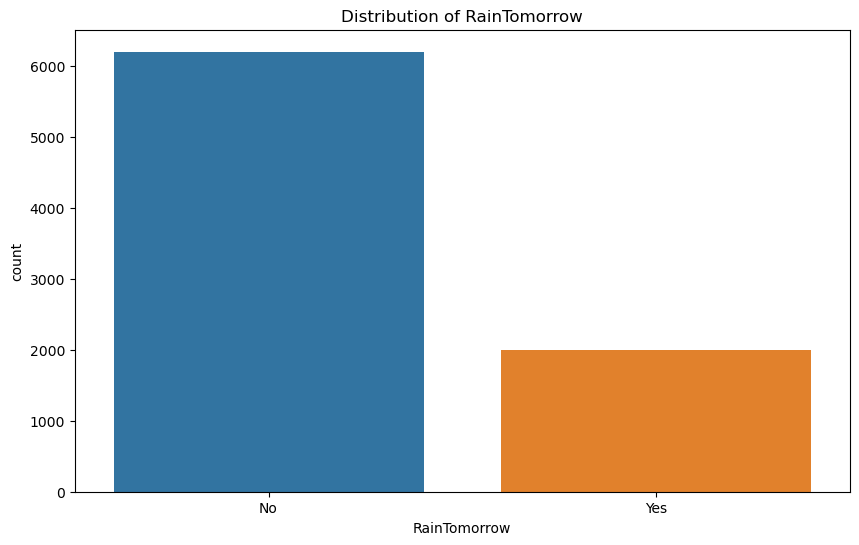

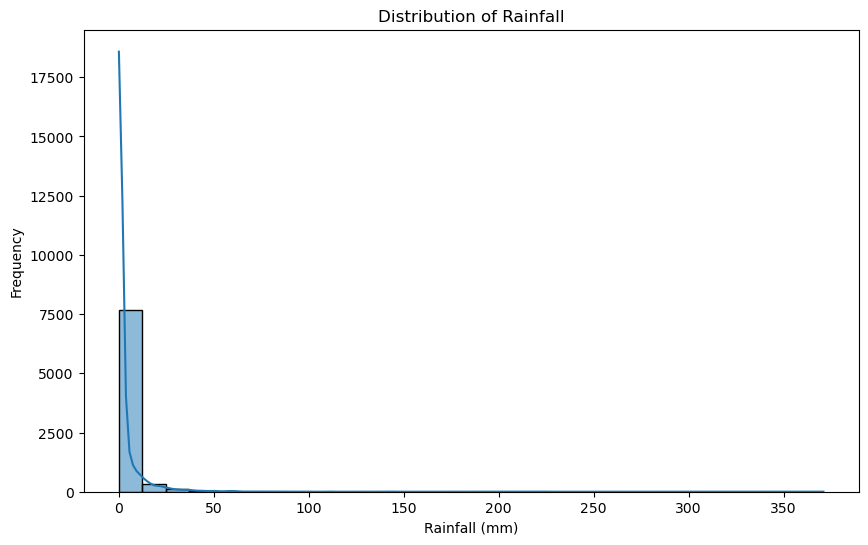

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13876\13158385.py:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


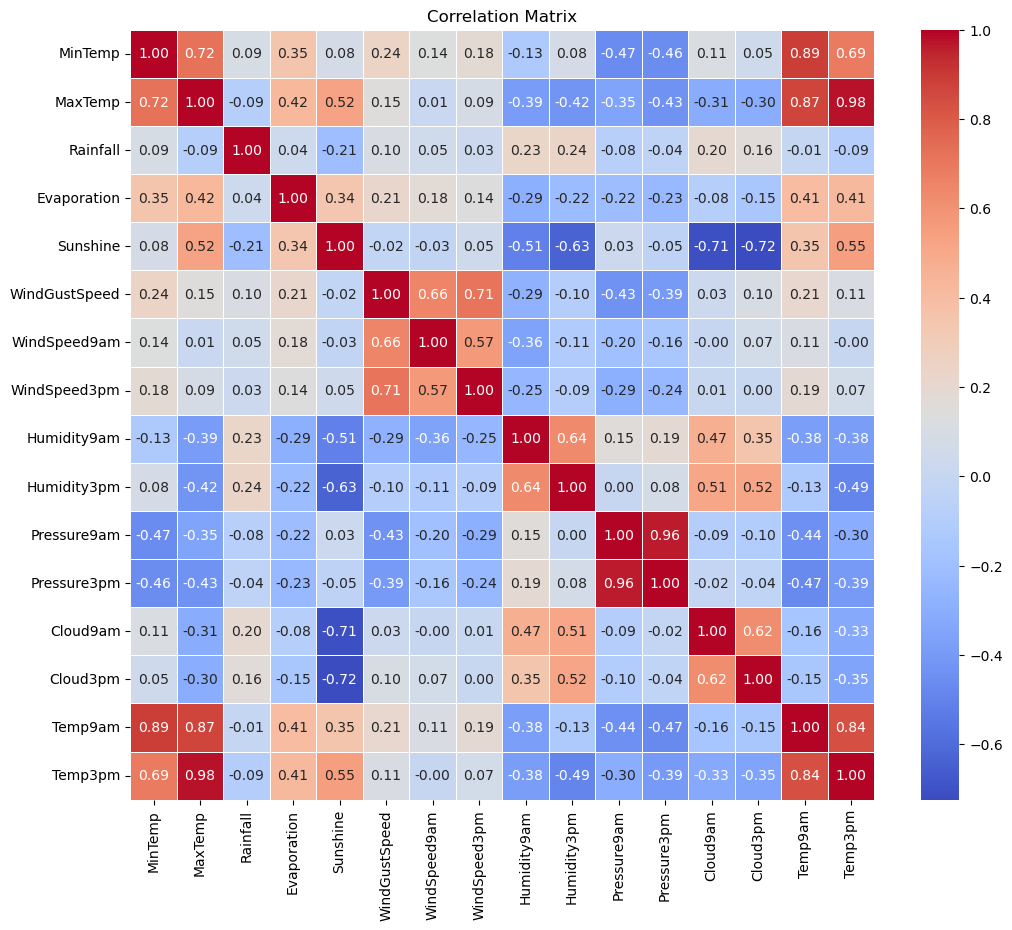

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true"
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
data.head()

# Check the dimensions of the dataset
print("Shape of the dataset:", data.shape)

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Summary statistics
print("Summary statistics:\n", data.describe())

# Data types and unique values
print("Data types:\n", data.dtypes)
print("Unique values:\n", data.nunique())

# Distribution of target variables
plt.figure(figsize=(10, 6))
sns.countplot(x='RainTomorrow', data=data)
plt.title('Distribution of RainTomorrow')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Rainfall'], bins=30, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [3]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true"
data = pd.read_csv(url)

# Display data types of each column
print("Data types of each column:")
print(data.dtypes)


Data types of each column:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [4]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true"
data = pd.read_csv(url)

# Display column names
print("Column names:")
print(data.columns)


Column names:
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [5]:
# Display row index (optional)
print("Row index:")
print(data.index)


Row index:
RangeIndex(start=0, stop=8425, step=1)


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true"
data = pd.read_csv(url)

# Convert 'RainTomorrow' column to numerical
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop rows with missing target values for both RainTomorrow and Rainfall
data_classification = data.dropna(subset=['RainTomorrow'])
data_regression = data.dropna(subset=['Rainfall'])

# Separate features and target for classification
X_classification = data_classification.drop(['RainTomorrow', 'Rainfall'], axis=1)
y_rain_tomorrow = data_classification['RainTomorrow']

# Separate features and target for regression
X_regression = data_regression.drop(['RainTomorrow', 'Rainfall'], axis=1)
y_rainfall = data_regression['Rainfall']

# Identify numerical and categorical columns
numeric_cols = X_classification.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = X_classification.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_processed_classification = preprocessor.fit_transform(X_classification)
X_processed_regression = preprocessor.transform(X_regression)

# Split data into training and testing sets for RainTomorrow prediction
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_processed_classification, y_rain_tomorrow, test_size=0.2, random_state=42)

# Split data into training and testing sets for Rainfall prediction
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_processed_regression, y_rainfall, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize models
models_regression = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Evaluate models
for name, model in models_regression.items():
    model.fit(X_train_rf, y_train_rf)
    y_pred = model.predict(X_test_rf)
    mse = mean_squared_error(y_test_rf, y_pred)
    r2 = r2_score(y_test_rf, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print()

# Cross-validation for the best performing model
best_model_rf = RandomForestRegressor()
cv_scores_rf = cross_val_score(best_model_rf, X_processed_regression, y_rainfall, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores_rf}")
print(f"Mean R^2 score: {cv_scores_rf.mean():.2f}")


Model: Linear Regression
Mean Squared Error: 100.48
R^2 Score: 0.13

Model: Decision Tree
Mean Squared Error: 83.77
R^2 Score: 0.27

Model: Random Forest
Mean Squared Error: 76.31
R^2 Score: 0.34

Model: Gradient Boosting
Mean Squared Error: 82.73
R^2 Score: 0.28

Model: Support Vector Regressor
Mean Squared Error: 98.29
R^2 Score: 0.15

Model: K-Nearest Neighbors
Mean Squared Error: 96.86
R^2 Score: 0.16

Cross-validation scores: [0.16922087 0.45745974 0.69996715 0.31709467 0.43013615]
Mean R^2 score: 0.41


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Initialize models
models_classification = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate models
for name, model in models_classification.items():
    model.fit(X_train_rt, y_train_rt)
    y_pred = model.predict(X_test_rt)
    accuracy = accuracy_score(y_test_rt, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test_rt, y_pred))
    print()

# Cross-validation for the best performing model
best_model_rt = RandomForestClassifier()
cv_scores_rt = cross_val_score(best_model_rt, X_processed_rt, y_rain_tomorrow, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_rt}")
print(f"Mean accuracy: {cv_scores_rt.mean():.2f}")


Model: Logistic Regression
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1314
           1       0.77      0.56      0.65       371

    accuracy                           0.87      1685
   macro avg       0.83      0.76      0.78      1685
weighted avg       0.86      0.87      0.86      1685


Model: Decision Tree
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1314
           1       0.73      0.74      0.74       371

    accuracy                           0.88      1685
   macro avg       0.83      0.83      0.83      1685
weighted avg       0.88      0.88      0.88      1685


Model: Random Forest
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1314
           1       0.91      0.66      0.76       371

    accuracy                           0.91      1685
   macro avg

NameError: name 'X_processed_rt' is not defined

In [9]:
# Function to check overfitting/underfitting for a model
def check_overfitting_underfitting(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Train Score: {train_score}")
    print(f"Test Score: {test_score}")
    if abs(train_score - test_score) > 0.1:
        print("Potential overfitting/underfitting detected.\n")
    else:
        print("Model is well-generalized.\n")

# Example with RandomForestClassifier for RainTomorrow prediction
from sklearn.ensemble import RandomForestClassifier

model_rt = RandomForestClassifier()
model_rt.fit(X_train_rt, y_train_rt)
check_overfitting_underfitting(model_rt, X_train_rt, y_train_rt, X_test_rt, y_test_rt)

# Example with RandomForestRegressor for Rainfall prediction
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train_rf, y_train_rf)
check_overfitting_underfitting(model_rf, X_train_rf, y_train_rf, X_test_rf, y_test_rf)


Train Score: 1.0
Test Score: 0.913946587537092
Model is well-generalized.

Train Score: 0.9075070312868126
Test Score: 0.33684768003142485
Potential overfitting/underfitting detected.



In [10]:
from sklearn.model_selection import cross_val_score

# Cross-validation for classification
model_rt_cv = RandomForestClassifier()
cv_scores_rt = cross_val_score(model_rt_cv, X_processed_classification, y_rain_tomorrow, cv=5, scoring='accuracy')
print(f"Cross-validation scores for classification: {cv_scores_rt}")
print(f"Mean accuracy for classification: {cv_scores_rt.mean():.2f}")

# Cross-validation for regression
model_rf_cv = RandomForestRegressor()
cv_scores_rf = cross_val_score(model_rf_cv, X_processed_regression, y_rainfall, cv=5, scoring='r2')
print(f"Cross-validation scores for regression: {cv_scores_rf}")
print(f"Mean R^2 score for regression: {cv_scores_rf.mean():.2f}")


Cross-validation scores for classification: [0.8379822  0.8379822  0.89198813 0.76142433 0.81780415]
Mean accuracy for classification: 0.83
Cross-validation scores for regression: [0.16541673 0.46644506 0.70683882 0.26774395 0.42535244]
Mean R^2 score for regression: 0.41


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Rainfall%20Forecast/Rainfall.csv"
data = pd.read_csv(url)

# Assuming you have done preprocessing and feature engineering and have X and y ready

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the best model to a file
joblib.dump(best_rf_clf, 'rain_prediction_model.pkl')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'X_rainfall' and 'y_rainfall' are your features and target for rainfall amount prediction

# Split data into training and testing sets
X_train_rainfall, X_test_rainfall, y_train_rainfall, y_test_rainfall = train_test_split(X_rainfall, y_rainfall, test_size=0.2, random_state=42)

# Initialize the regressor
rf_reg = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_reg = GridSearchCV(estimator=rf_reg, param_grid=param_grid_reg, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search_reg.fit(X_train_rainfall, y_train_rainfall)

# Print the best parameters found
print("Best Parameters for Rainfall Amount:", grid_search_reg.best_params_)

# Get the best estimator
best_rf_reg = grid_search_reg.best_estimator_

# Evaluate the best model on the test set
y_pred_rainfall = best_rf_reg.predict(X_test_rainfall)
mse = mean_squared_error(y_test_rainfall, y_pred_rainfall)
print("\nMean Squared Error:", mse)

# Save the best model to a file
joblib.dump(best_rf_reg, 'rainfall_amount_prediction_model.pkl')


Explanation:
RandomForestClassifier: Used for rain prediction (binary classification).
RandomForestRegressor: Used for rainfall amount prediction (regression).
GridSearchCV: Used to perform hyperparameter tuning with 5-fold cross-validation.
param_grid: Specifies the hyperparameters to tune (n_estimators, max_depth, min_samples_split, min_samples_leaf).
param_grid_reg: Similar hyperparameters for regression.